# Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a
similarity  function  that  measures  how  much  each  instance  resembles  a  particular
landmark.

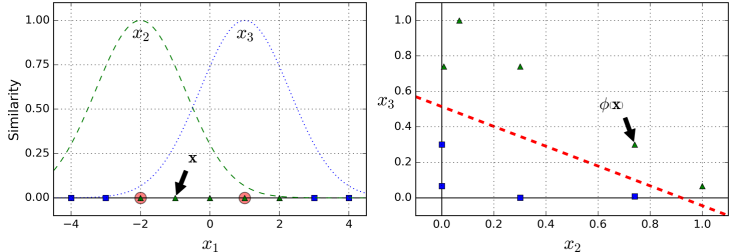


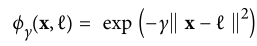

Gaussian function is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark). 

We choose the landmarks to be -2 and 1, and γ = 0.3.

For each sample, we use the distances to those two Gaussians (as x2 and x3) as our new features.  As  you  can  see,  it  is  now  linearly
separable.

My notes: Guasian aka RBF kernel  
Dataset one dimension (green triangles on line surrounded by blue squares)- not linearly separable

Pick two samples: -2, 1. Draw two guasian curves with centers at -2,1.  
For each sample, calculate the distance from that sampe to the green curve.

For example: sample at x=0:   
    distance to green curve (x2): .25
    distance to blue curve (x3): .75  
    Map this to a new dimension using the distances to each curve.  
    Throw away original data. Use distances as x and y axis. Now have linear boundary. 
    
    
**Hyperparameter Gamma**  
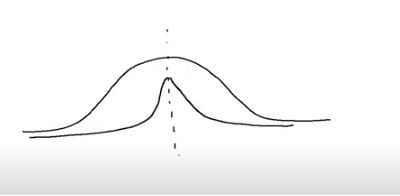
Gamma controls how "fat" gaussian curve is

### How to select the landmarks: 
The simplest approach is to create a
landmark at the location of each and every instance in the dataset. This creates many
dimensions and thus increases the chances that the transformed training set will be
linearly separable. The downside is that a training set with *m* instances and *n* features
gets transformed into a training set with *m* instances and *m* features (assuming you
drop  the  original  features).  If  your  training  set  is  very  large,  you  end  up  with  an
equally large number of features.

Just like the polynomial features method, the similarity features method can be useful
with  any  Machine  Learning  algorithm,  but  it  may  be  **computationally  expensive**  to
compute  all  the  additional  features,  especially  on  large  training  sets.  However,  once
again  the  kernel  trick  does  its  SVM  magic:  it  makes  it  possible  to  obtain  a  similar
result  as  if  you  had  added  many  similarity  features,  without  actually  having  to  add
them. 

My notes:  
We picked -2,1. We don't know which one to pick. Have to draw gausian curves on ALL samples.   
That's a lot. Computationally expensive.   
N samples= N gausian curves, then have to calculate N distances.   
Introduce a NxN matrix to samples space

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42) #make the moons

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()), #always need standard scaler
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)) #specify kernel to be RBF
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

###  hyperparameters  gamma  (γ)
**Increasing gamma**  makes the bell-shape curve narrower , and as a
result  each  instance’s  range  of  influence  is  smaller:  the  decision  boundary  ends  up
being more irregular, *wiggling around individual instances*. Conversely, a **small  gamma**
value  makes  the  bell-shaped  curve  wider,  so  instances  have  a  larger  range  of  influence,  and  the  decision  boundary  ends  up  *smoother*.  

So  γ  acts  like  a  regularization
hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it (similar to the  C  hyperparameter).

In [2]:
# helper functions
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

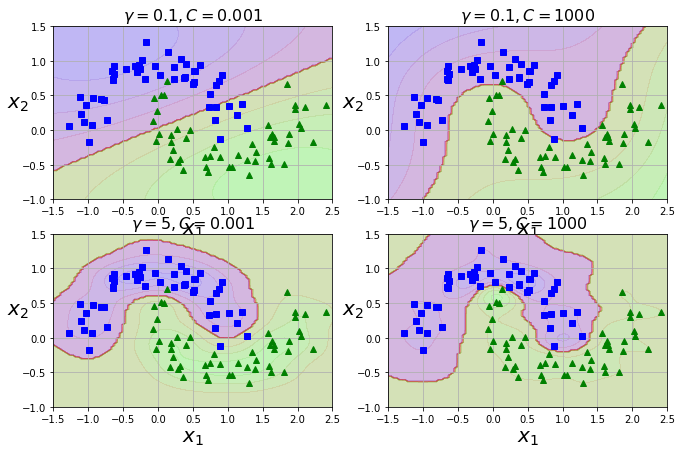

In [3]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

My notes  
Upper Left: small gamma and small C => Linear boundary 
Underfit. Did not capture the curve of the data.  
Low gamma=fat guasian curve. So distances between samples to low curve not very different 
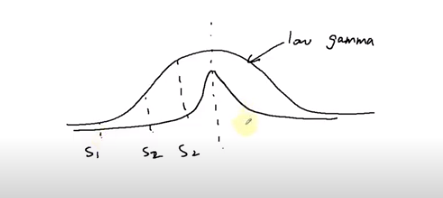

Lower Right:  
Good classification but top left corner classified green-doesn't make sense
High Gamma and High C, both can contribute to OVERFIT model. 

General Rule: when doing grid search, do 10^-3 to 1o^3, go higher or lower risky





In practice, a logarithmic grid from 10^(-3) to 10^3 is usually sufficient. If the best parameters lie on the boundaries of the grid, it can be extended in that direction in a subsequent search.

### hyperparameters C

The C parameter trades off misclassification of training examples against simplicity of the decision surface. 
- A low C makes the decision surface smooth (likely to underfit)
- A high C aims at classifying all training examples correctly (likely to overfit)

### Choose C and gamma:

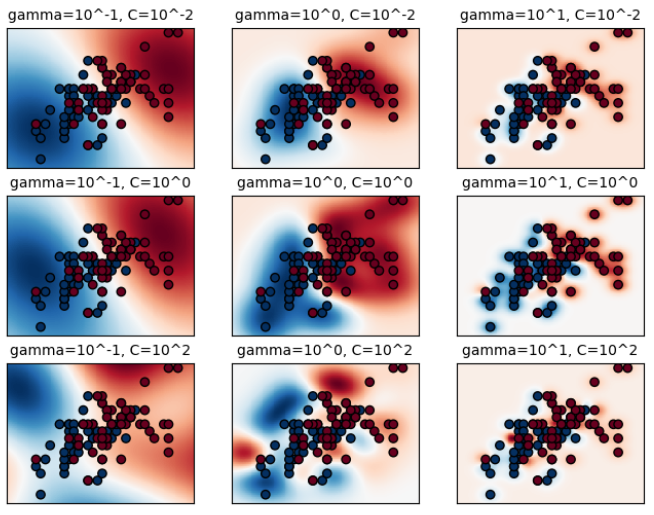


My Notes:  
Upper left: low gamma and low C- linear.   
Bottom right: high gamma and high C. Learning only on the training samples.  
Not much blue or red shading- don't know how to classify anything that wasn't exactly the same as training. Overfit.   
End

When gamma is very **small**, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a **linear model** with a set of hyperplanes that separate the centers of high density of any pair of two classes.

For intermediate values, we can see on the second plot that good models can be found on a diagonal of C and gamma. Smooth models (lower gamma values) can be made more complex by selecting a larger number of support vectors (larger C values) hence the diagonal of good performing models.

Finally one can also observe that for some intermediate values of gamma we get equally performing models when C becomes very large: it is not necessary to regularize by limiting the number of support vectors. The radius of the RBF kernel alone acts as a good structural regularizer. In practice though it might still be interesting to limit the number of support vectors with a lower value of C so as to favor models that use less memory and that are faster to predict.

More reading and code sample: http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

# Grid Search
Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [4]:
# kernel: Gaussian radio basis function
param_grid = {'C': [0.01,1,  100], 'gamma': [ 100, 1,0.01], 'kernel': ['rbf']} 

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [6]:

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
#create SVM Model and send parameters list

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [7]:
grid.fit(X,y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=100, kernel=rbf, score=0.765, total=   0.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=100, kernel=rbf, score=0.882, total=   0.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=100, kernel=rbf, score=0.656, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.882, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.844, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 1, 100], 'gamma': [100, 1, 0.01],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [8]:
grid.best_params_
#C is the highest value given. 
#don't want to try 500,1000.... but try something slightly lower 50,20
#gamma: in middle. 
#try gamma 5, 0.5 

#point: shouldnt go extreme and go very high or very low C or gamma

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

# Discuss:

What is the best strategy for doing a grid search?

<font color='red'>It is often faster to first do a very
coarse grid search, then a finer grid search around the best values
found. Having a good sense of what each hyperparameter actually
does can also help you search in the right part of the hyperparamter space.</font>

# Exercise

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll use the built in breast cancer dataset from Scikit Learn. We can get with the load function:

In [25]:
from sklearn.datasets import load_breast_cancer

In [26]:
cancer = load_breast_cancer()


## Set up DataFrame

In [27]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [28]:
target = cancer['target']

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, target, test_size=0.30, random_state=101)

# Gridsearch


Try to do a coarse grid search, then a finer grid search to find a good combination of C and gamma

In [31]:
# create a dictionary of the parameters you want to train the SVC model with
# c controls the cost of misclassification on the training data
# a high c value gives low bias and higher variance
# a low c value gives higher bias and lower variance

# kernel: Gaussian radio basis function



In [36]:
#went from 10^-3 .001 to 10^3 1000
#very course grid search
param_grid = {'C': [0.001, 0.01, 10,  100], 'gamma': [ 0.001, 0.1, 10, 10000], 'kernel': ['rbf']} 

In [37]:

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [38]:
# May take awhile!
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.636, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.636, total=   0.0s
[CV] C=0.001, gamma=10, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 10, 100],
                         'gamma': [0.001, 0.1, 10, 10000], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [39]:
# get the best parameters found (first gird search)
#got medium C and very small gamma
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [40]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
# finer grid search
param_grid = {'C': [1, 10,  100], 'gamma': [ 0.001, 0.1], 'kernel': ['rbf']} 
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.636, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.636, total=   0.0s
[CV] C=0.001, gamma=10, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 10, 100],
                         'gamma': [0.001, 0.1, 10, 10000], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [44]:
# get the best parameters found (2nd gird search)
#second round got C=10, gamma=.001 both remain
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Then you can re-run predictions on this grid object just like you would with a normal model.

In [49]:
# apply the best model found to the training dataset again 
grid_predictions=grid.predict(X_test) 
#by default will use best model. 

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,grid_predictions))

[[ 59   7]
 [  5 100]]


In [51]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        66
           1       0.93      0.95      0.94       105

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



# To sum up
- rbf kernel:
    - use all the samples as landmarks
        -Draw guassian curve on all samples 
    - add the distances between each sample and each Gaussian curves as new features
        - Careful: will be slow on big data set
- grid search to find the good combination of gamma and C

Low gamma low C, underfit model
high gamma high C, overfit model
    ONly learn from training data, don't learn whole model
